In [1]:
# Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style("whitegrid")

In [20]:
# Importing the Dataset
loan_train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
loan_test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [21]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [23]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
# Checking for duplicate records
loan_train.duplicated().sum()

0

In [25]:
# Dropping Unwanted columns
loan_train.drop(axis = 1, columns = "Loan_ID", inplace = True)

In [26]:
# Splitting the train dataset into dependent and Independent Variable

X = loan_train.iloc[:, :-1].values
y = loan_train.iloc[:, -1].values

In [27]:
X[:5, :]

array([['Male', 'No', '0', 'Graduate', 'No', 5849, 0.0, nan, 360.0, 1.0,
        'Urban'],
       ['Male', 'Yes', '1', 'Graduate', 'No', 4583, 1508.0, 128.0, 360.0,
        1.0, 'Rural'],
       ['Male', 'Yes', '0', 'Graduate', 'Yes', 3000, 0.0, 66.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', '0', 'Not Graduate', 'No', 2583, 2358.0, 120.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'No', '0', 'Graduate', 'No', 6000, 0.0, 141.0, 360.0,
        1.0, 'Urban']], dtype=object)

In [28]:
# Checking for Null values
pd.isnull(X[:, [0]]).sum()

13

In [29]:
cols = loan_train.columns

In [30]:
for i in cols:
    print(i)
    print("Total Null Values\t:\t", loan_train[i].isnull().sum())
    print(loan_train[i].value_counts())
    print()

Gender
Total Null Values	:	 13
Male      489
Female    112
Name: Gender, dtype: int64

Married
Total Null Values	:	 3
Yes    398
No     213
Name: Married, dtype: int64

Dependents
Total Null Values	:	 15
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education
Total Null Values	:	 0
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed
Total Null Values	:	 32
No     500
Yes     82
Name: Self_Employed, dtype: int64

ApplicantIncome
Total Null Values	:	 0
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

CoapplicantIncome
Total Null Values	:	 0
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

LoanAmount
Total Null Values	:	 22
120.0    20
110.0    17
100.0    15
187.0   

In [31]:
# Filling the Null values

from sklearn.impute import SimpleImputer

gender_imputer = SimpleImputer(strategy = "most_frequent")
X[:, [0]] = gender_imputer.fit_transform(X[:, [0]])

marry_imputer = SimpleImputer(strategy = "most_frequent")
X[:, [1]] = marry_imputer.fit_transform(X[:, [1]])

dependents_imputer = SimpleImputer(strategy = "most_frequent")
X[:, [2]] = dependents_imputer.fit_transform(X[:, [2]])

employ_imputer = SimpleImputer(strategy = "most_frequent")
X[:, [4]] = employ_imputer.fit_transform(X[:, [4]])

LA_imputer = SimpleImputer(strategy = "mean")
X[:, [7]] = LA_imputer.fit_transform(X[:, [7]])

LAT_imputer = SimpleImputer(strategy = "most_frequent")
X[:, [8]] = LAT_imputer.fit_transform(X[:, [8]])

cred_imputer = SimpleImputer(strategy = "most_frequent")
X[:, [9]] = cred_imputer.fit_transform(X[:, [9]])

----------------------------------------------------------------------------------------------------------------

In [32]:
pd.Series(X[:, 10]).value_counts()

Semiurban    233
Urban        202
Rural        179
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

gender_encoder = LabelEncoder()
X[:, 0] = gender_encoder.fit_transform(X[:, 0])

marry_encoder = LabelEncoder()
X[:, 1] = marry_encoder.fit_transform(X[:, 1])



graduate_encoder = LabelEncoder()
X[:, 3] = graduate_encoder.fit_transform(X[:, 3])

self_emp_encoder = LabelEncoder()
X[:, 4] = self_emp_encoder.fit_transform(X[:, 4])



column_transformer = ColumnTransformer(transformers = [('PA_encoder', OneHotEncoder(), [10])], remainder="passthrough")
X = column_transformer.fit_transform(X)

In [34]:
PA_encoder.categories_

[array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [35]:
X[:5, :]

array([[0.0, 0.0, 1.0, 1, 0, '0', 0, 0, 5849, 0.0, 146.41216216216216,
        360.0, 1.0],
       [1.0, 0.0, 0.0, 1, 1, '1', 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0],
       [0.0, 0.0, 1.0, 1, 1, '0', 0, 1, 3000, 0.0, 66.0, 360.0, 1.0],
       [0.0, 0.0, 1.0, 1, 1, '0', 1, 0, 2583, 2358.0, 120.0, 360.0, 1.0],
       [0.0, 0.0, 1.0, 1, 0, '0', 0, 0, 6000, 0.0, 141.0, 360.0, 1.0]],
      dtype=object)

In [36]:
print(X[:, 5])

['0' '1' '0' '0' '0' '2' '0' '3+' '2' '1' '2' '2' '2' '0' '2' '0' '1' '0'
 '0' '0' '0' '1' '0' '2' '1' '0' '0' '2' '0' '2' '1' '0' '1' '0' '3+' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '2'
 '1' '2' '0' '0' '1' '2' '0' '3+' '0' '1' '0' '0' '0' '1' '3+' '0' '0' '2'
 '0' '3+' '3+' '0' '0' '1' '3+' '3+' '0' '1' '2' '0' '1' '0' '2' '0' '0'
 '0' '0' '2' '2' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '1' '2'
 '0' '2' '3+' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '2' '0'
 '0' '3+' '0' '1' '0' '0' '0' '0' '0' '0' '3+' '0' '2' '0' '2' '2' '0' '0'
 '0' '2' '0' '2' '1' '0' '0' '0' '0' '0' '2' '0' '3+' '1' '1' '0' '0' '0'
 '0' '1' '2' '0' '0' '0' '0' '0' '2' '0' '3+' '3+' '0' '0' '0' '2' '3+'
 '1' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '1' '2' '3+' '1' '2' '0' '0' '0' '0' '0' '0' '3+' '1'
 '3+' '0' '3+' '0' '0' '2' '2' '0' '2' '0' '0' '0' '0' '0' '2' '0' '0' '1'
 '0' '0' '0' '1' '1' '0' '0' '1' '1' '2' '1'

In [37]:
def dependents_column_changer(a):
    if a == "0":
        return 0
    elif a == "1":
        return 1
    elif a == "2":
        return 2
    else:
        return 3

In [38]:
X[:, 5] = [dependents_column_changer(a) for a in X[:, 5]]

In [40]:
X[:10, :]

array([[0.0, 0.0, 1.0, 1, 0, 0, 0, 0, 5849, 0.0, 146.41216216216216,
        360.0, 1.0],
       [1.0, 0.0, 0.0, 1, 1, 1, 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0],
       [0.0, 0.0, 1.0, 1, 1, 0, 0, 1, 3000, 0.0, 66.0, 360.0, 1.0],
       [0.0, 0.0, 1.0, 1, 1, 0, 1, 0, 2583, 2358.0, 120.0, 360.0, 1.0],
       [0.0, 0.0, 1.0, 1, 0, 0, 0, 0, 6000, 0.0, 141.0, 360.0, 1.0],
       [0.0, 0.0, 1.0, 1, 1, 2, 0, 1, 5417, 4196.0, 267.0, 360.0, 1.0],
       [0.0, 0.0, 1.0, 1, 1, 0, 1, 0, 2333, 1516.0, 95.0, 360.0, 1.0],
       [0.0, 1.0, 0.0, 1, 1, 3, 0, 0, 3036, 2504.0, 158.0, 360.0, 0.0],
       [0.0, 0.0, 1.0, 1, 1, 2, 0, 0, 4006, 1526.0, 168.0, 360.0, 1.0],
       [0.0, 1.0, 0.0, 1, 1, 1, 0, 0, 12841, 10968.0, 349.0, 360.0, 1.0]],
      dtype=object)

In [42]:
y[:10]

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N'], dtype=object)

# Visualization of the DataSet

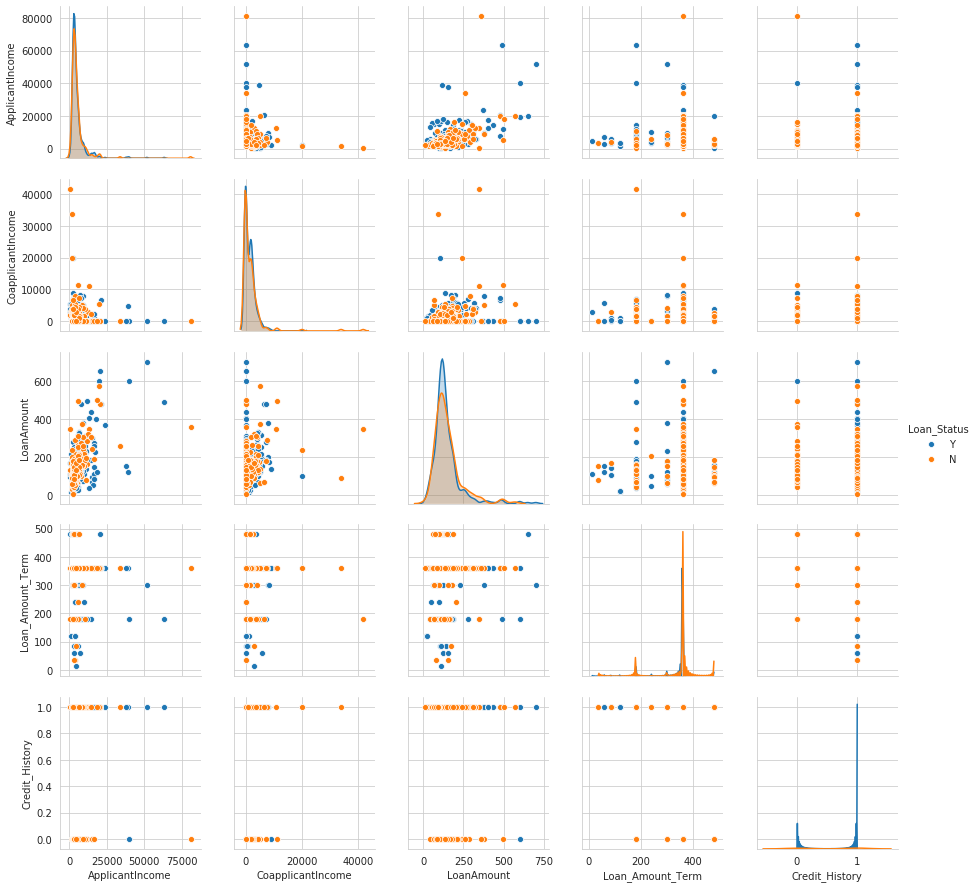

In [52]:
sb.pairplot(data = loan_train, hue = "Loan_Status")

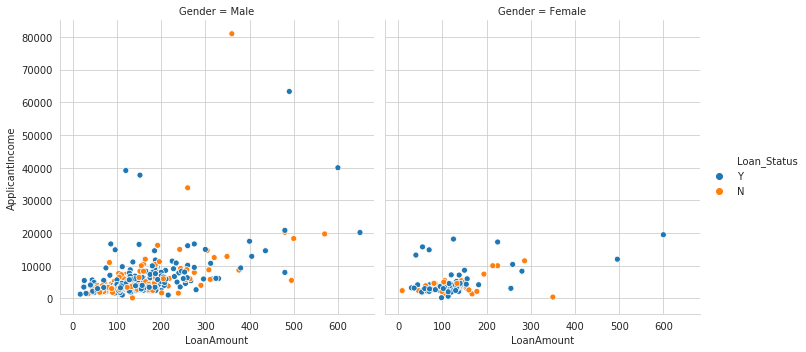

In [58]:
sb.relplot(x = "LoanAmount", y = "ApplicantIncome", data = loan_train, hue = "Loan_Status", col = "Gender")

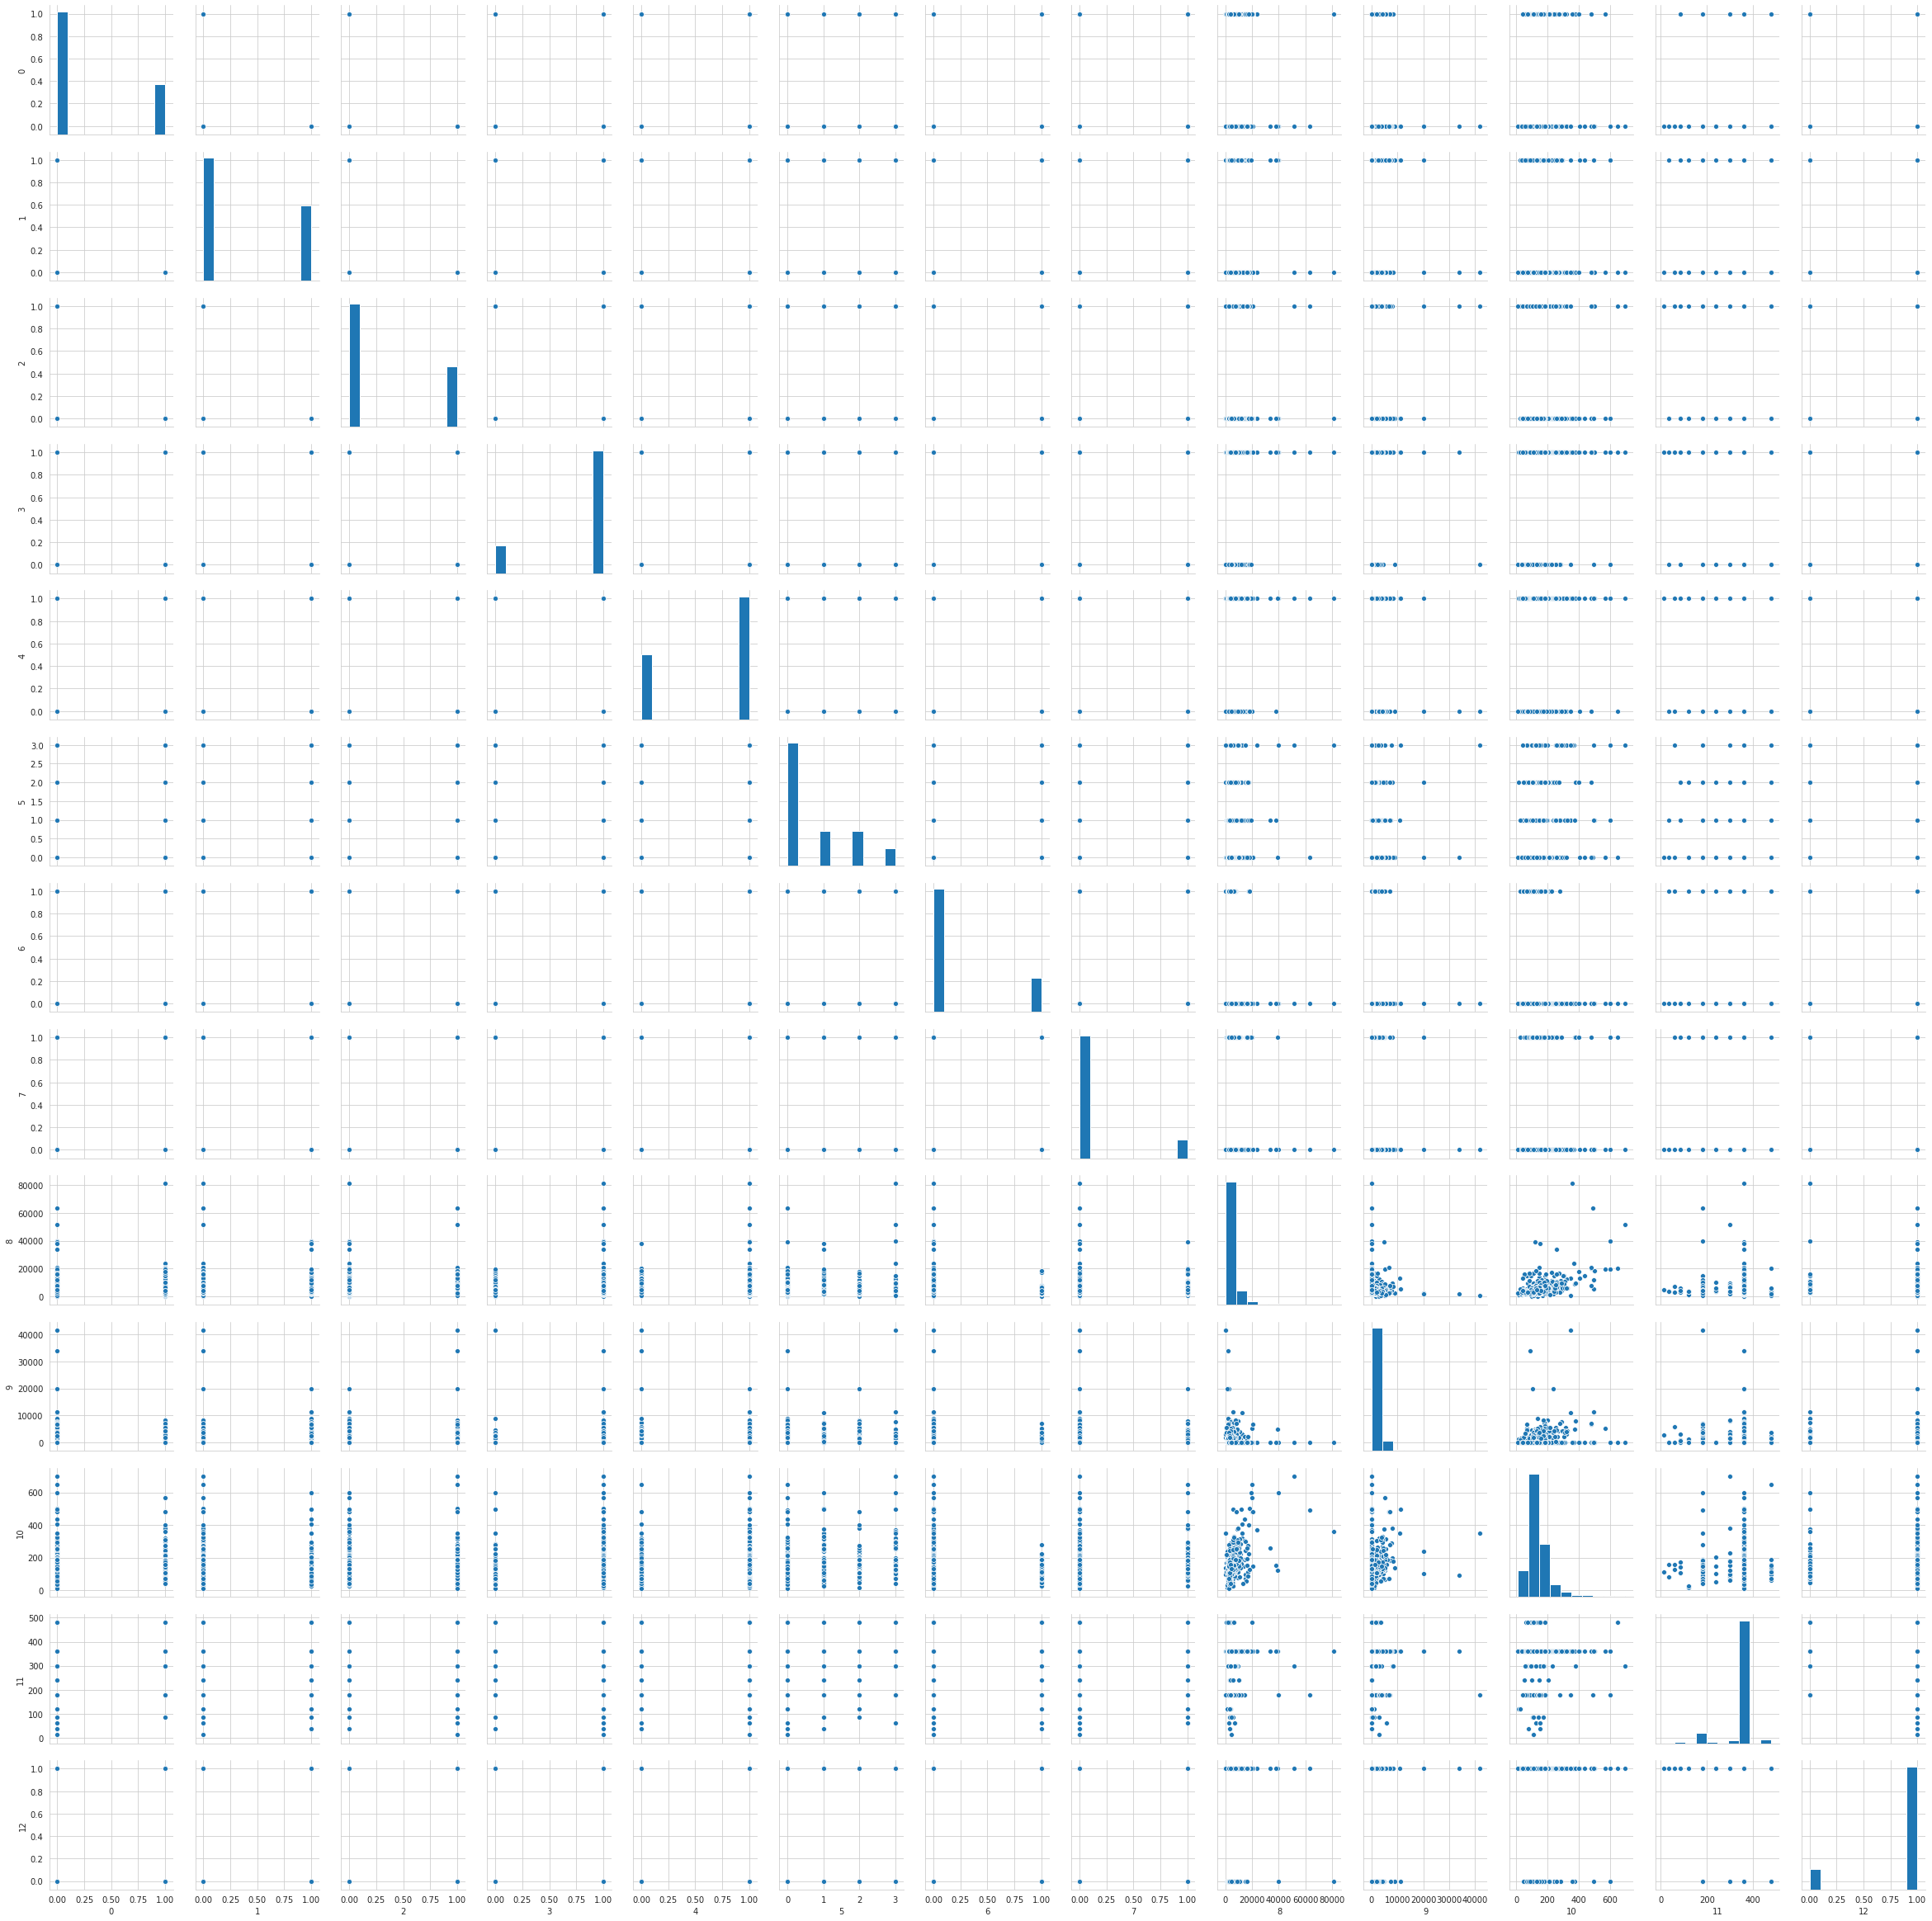

In [57]:
sb.pairplot(pd.DataFrame(X))

In [59]:
X[:5, :]

array([[0.0, 0.0, 1.0, 1, 0, 0, 0, 0, 5849, 0.0, 146.41216216216216,
        360.0, 1.0],
       [1.0, 0.0, 0.0, 1, 1, 1, 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0],
       [0.0, 0.0, 1.0, 1, 1, 0, 0, 1, 3000, 0.0, 66.0, 360.0, 1.0],
       [0.0, 0.0, 1.0, 1, 1, 0, 1, 0, 2583, 2358.0, 120.0, 360.0, 1.0],
       [0.0, 0.0, 1.0, 1, 0, 0, 0, 0, 6000, 0.0, 141.0, 360.0, 1.0]],
      dtype=object)

In [65]:
corr = loan_train.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


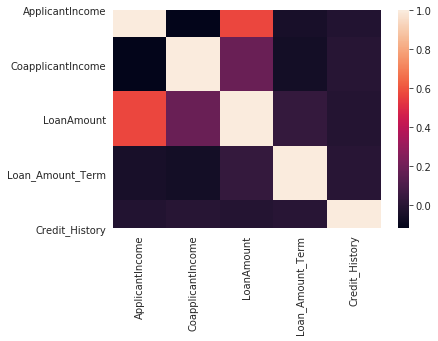

In [66]:
sb.heatmap(data = corr)

In [71]:
from sklearn.linear_model import LogisticRegression

In [82]:
classifier = LogisticRegression(solver = "liblinear")

In [83]:
classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
classifier.predict([[1.0, 0.0, 0.0, 1, 0, 0, 0, 0, 5849, 0.0, 146.41216216216216, 360.0, 1.0]])

array(['Y'], dtype=object)

# Predicting the Test Data Results

In [98]:
loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [97]:
loan_test.drop(axis = 1, columns = "Loan_ID", inplace = True)

In [103]:
X_test = loan_test.iloc[:, :].values

In [105]:

X_test[:, [0]] = gender_imputer.transform(X_test[:, [0]])

X_test[:, [1]] = marry_imputer.transform(X_test[:, [1]])

X_test[:, [2]] = dependents_imputer.transform(X_test[:, [2]])

X_test[:, [4]] = employ_imputer.transform(X_test[:, [4]])

X_test[:, [7]] = LA_imputer.transform(X_test[:, [7]])

X_test[:, [8]] = LAT_imputer.transform(X_test[:, [8]])

X_test[:, [9]] = cred_imputer.transform(X_test[:, [9]])

In [106]:
pd.isnull(X_test).sum()

0

In [107]:
X_test[:, 0] = gender_encoder.transform(X_test[:, 0])

X_test[:, 1] = marry_encoder.transform(X_test[:, 1])

X_test[:, 3] = graduate_encoder.transform(X_test[:, 3])

X_test[:, 4] = self_emp_encoder.transform(X_test[:, 4])

X_test = column_transformer.transform(X_test)

In [109]:
X_test[:, 5] = [dependents_column_changer(a) for a in X_test[:, 5]]

In [110]:
X_test[:1, :]

array([[0.0, 0.0, 1.0, 1, 1, 0, 0, 0, 5720, 0, 110.0, 360.0, 1.0]],
      dtype=object)

In [111]:
# Predicting the test Data

y_pred = classifier.predict(X_test)

In [112]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

## Thus the Loan Prediction

# Thank You